In [1]:
import sys
sys.path.append('../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
from scripts.price_data.get_price import GetPriceData

price_getter = GetPriceData()

from pprint import pprint

## 1. Portfolios

In [34]:
portfolio_A

NameError: name 'portfolio_A' is not defined

## 2. Price var Examples

### NVIDIA

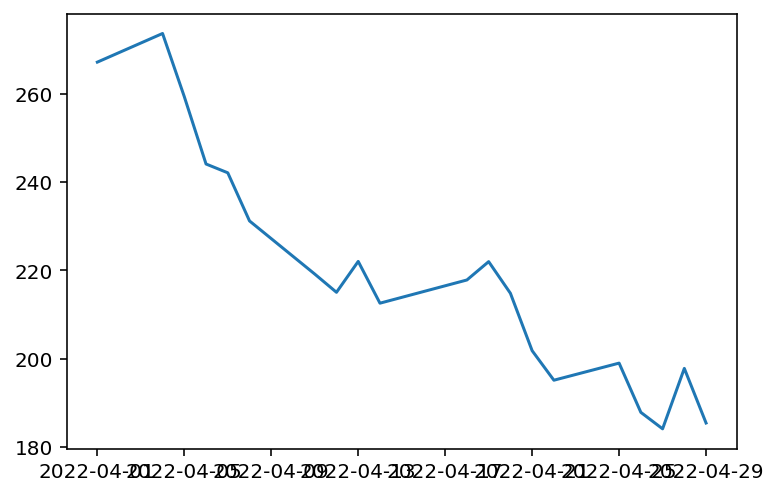

In [2]:
nvidia = "NVDA"
start_date = "2022-04-02"
end_date = "2022-05-01"
start_date_delay = "2022-03-31"
end_date_delay = "2022-04-28"


prices = price_getter.get_close_price_all(nvidia, start_date, end_date)
prices_delay = price_getter.get_close_price_all(nvidia, start_date_delay, end_date_delay)
plt.plot(price_getter.get_close_price_all(nvidia, start_date, end_date))

In [3]:
prices

Date
2022-04-01    267.119995
2022-04-04    273.600006
2022-04-05    259.309998
2022-04-06    244.070007
2022-04-07    242.080002
2022-04-08    231.190002
2022-04-11    219.169998
2022-04-12    215.039993
2022-04-13    222.029999
2022-04-14    212.580002
2022-04-18    217.830002
2022-04-19    221.979996
2022-04-20    214.820007
2022-04-21    201.830002
2022-04-22    195.149994
2022-04-25    199.020004
2022-04-26    187.880005
2022-04-27    184.149994
2022-04-28    197.820007
2022-04-29    185.470001
Name: Close, dtype: float64

In [4]:
prices_delay


Date
2022-03-30    276.899994
2022-03-31    272.859985
2022-04-01    267.119995
2022-04-04    273.600006
2022-04-05    259.309998
2022-04-06    244.070007
2022-04-07    242.080002
2022-04-08    231.190002
2022-04-11    219.169998
2022-04-12    215.039993
2022-04-13    222.029999
2022-04-14    212.580002
2022-04-18    217.830002
2022-04-19    221.979996
2022-04-20    214.820007
2022-04-21    201.830002
2022-04-22    195.149994
2022-04-25    199.020004
2022-04-26    187.880005
2022-04-27    184.149994
Name: Close, dtype: float64

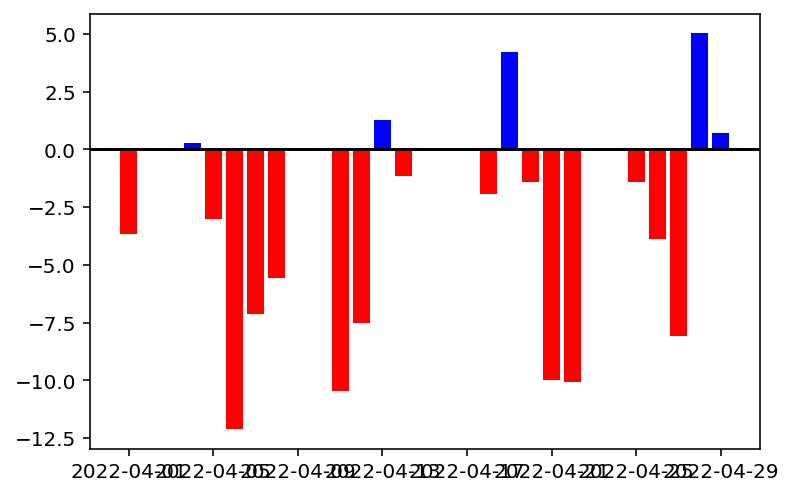

In [5]:
date_list = prices.index
# plt.plot(date_list, prices)
price_diffs = (prices.values - prices_delay.values) / prices.values * 100
price_diffs_color = ["red" if price_diff < 0 else "blue" for price_diff in price_diffs]
plt.bar(date_list, price_diffs, color=price_diffs_color)
plt.axhline(0, color='black')

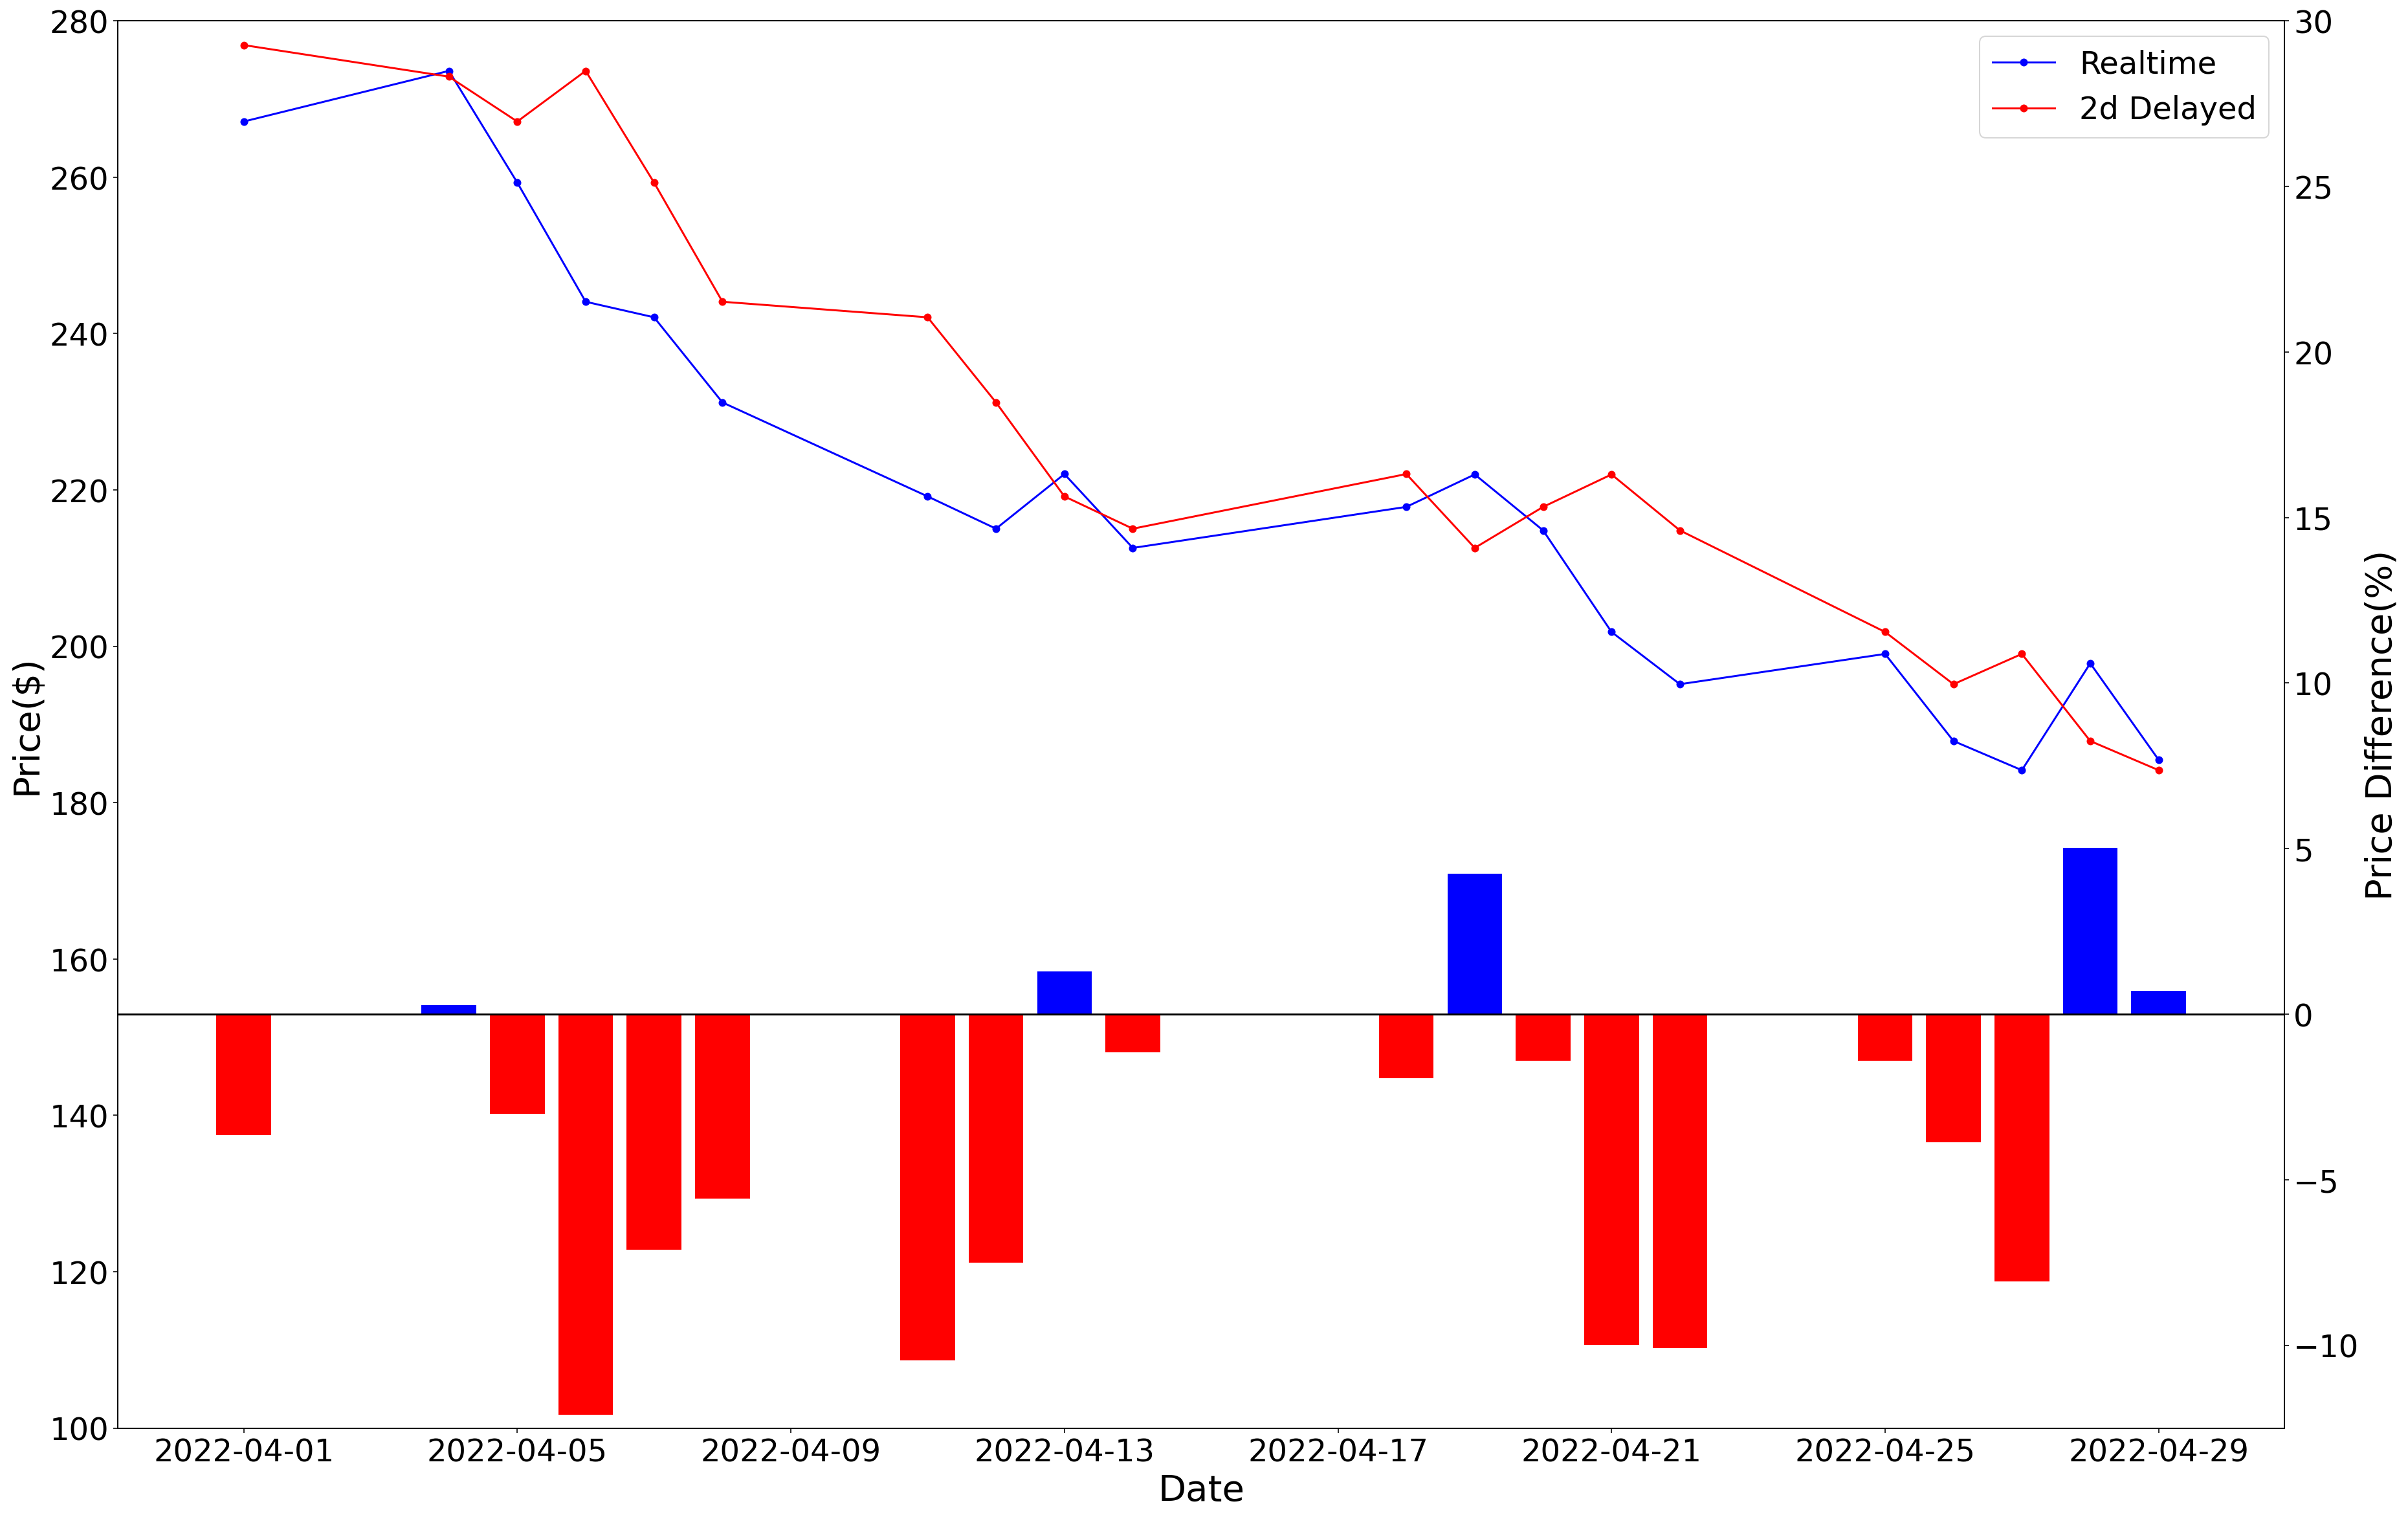

In [22]:
# plt.title('NVIDIA', fontsize=30, pad=20, fontname="Hiragino Sans")
# plt.figure(figsize=(30,20))
fig, ax1 = plt.subplots(figsize=(30,20))
ax2 = ax1.twinx()

ax1.set_xlabel('Date', fontsize=28)  # x軸ラベル
ax1.tick_params(axis='x', labelsize=24)
ax1.set_ylabel('Price($)', fontsize=28)  # y軸ラベル
ax1.tick_params(axis='y', labelsize=24)
# ax1.set_title('NVIDIA', fontsize=32) # グラフタイトル
ax1.plot(prices, color="blue", marker='o', markersize=5, label="Realtime")
ax1.plot(date_list, prices_delay.values, marker='o', markersize=5, color="red", label="2d Delayed")
ax1.legend(loc=0, fontsize=24)    # 凡例
ax1.set_ylim(100, 280)
# plt.rcParams['fontsize'] = 25

ax2.bar(date_list, price_diffs, color=price_diffs_color)
ax2.set_ylabel('Price Difference(%)', fontsize=28)
ax2.tick_params(axis='y', labelsize=24)
ax2.set_ylim(-12.5, 30)
ax2.axhline(0, color='black')

### Apple

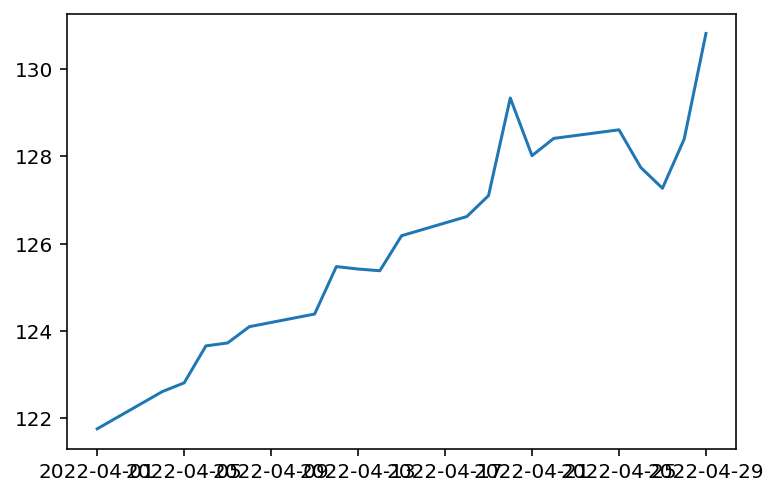

In [23]:
apple = "JPY=X"
start_date = "2022-04-02"
end_date = "2022-05-01"
start_date_delay = "2022-03-31"
end_date_delay = "2022-04-28"


prices2 = price_getter.get_close_price_all(apple, start_date, end_date)
prices_delay2 = price_getter.get_close_price_all(apple, start_date_delay, end_date_delay)
plt.plot(price_getter.get_close_price_all(apple, start_date, end_date))

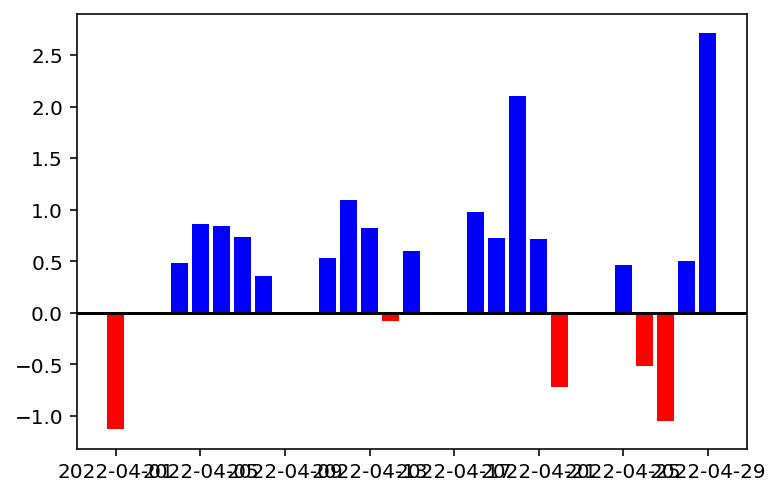

In [24]:
date_list2 = prices2.index
# plt.plot(date_list, prices)
price_diffs2 = (prices2.values - prices_delay2.values) / prices2.values * 100
price_diffs_color2 = ["red" if price_diff < 0 else "blue" for price_diff in price_diffs2]
plt.bar(date_list2, price_diffs2, color=price_diffs_color2)
plt.axhline(0, color='black')

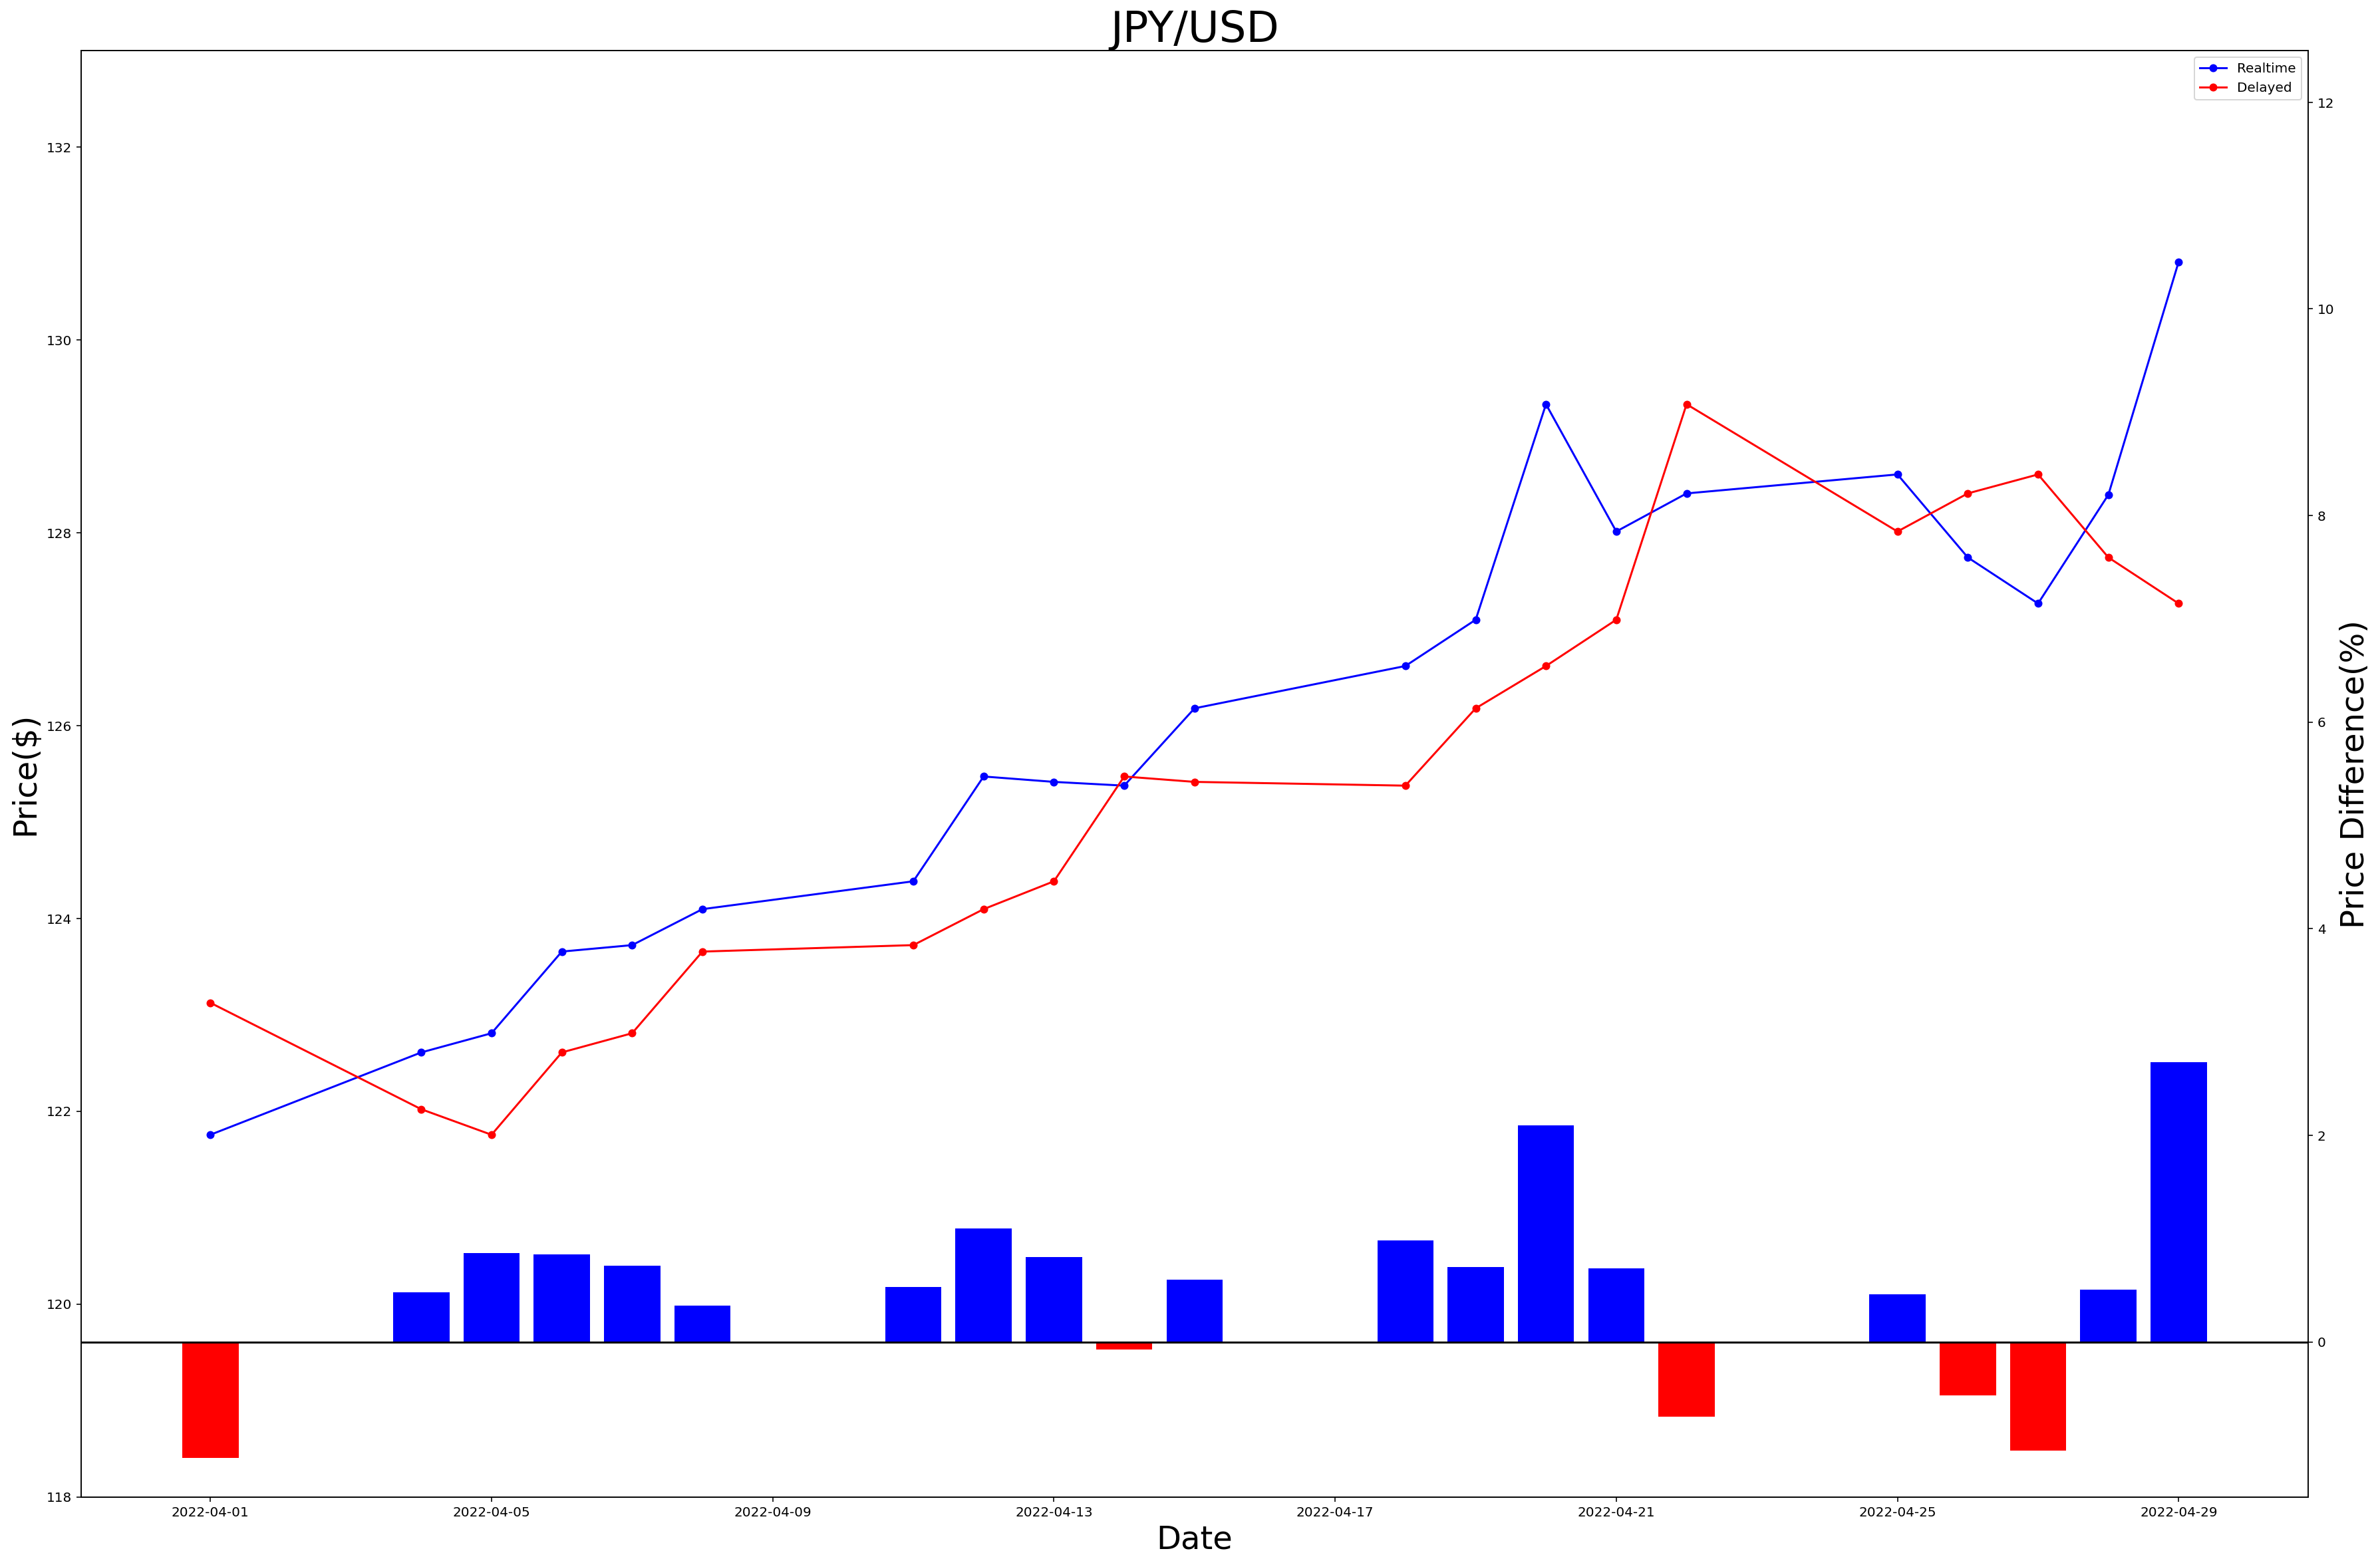

In [34]:
fig2, ax12 = plt.subplots(figsize=(30,20))
ax22 = ax12.twinx()

ax12.set_xlabel('Date', fontsize=24)  # x軸ラベル
ax12.set_ylabel('Price($)', fontsize=24)  # y軸ラベル
ax12.set_title('JPY/USD', fontsize=32) # グラフタイトル
ax12.plot(prices2, color="blue", marker='o', markersize=5, label="Realtime")
ax12.plot(date_list2, prices_delay2.values, marker='o', markersize=5, color="red", label="Delayed")
ax12.legend(loc=0)    # 凡例
ax12.set_ylim(118, 133)

ax22.bar(date_list2, price_diffs2, color=price_diffs_color2)
ax22.set_ylabel('Price Difference(%)', fontsize=24)
ax22.set_ylim(-1.5, 12.5)
ax22.axhline(0, color='black')